In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from argparse import Namespace

In [2]:
csnn_path = 'artificial/csnn'
csnn_logs = [os.path.join(csnn_path, i) for i in os.listdir(csnn_path) if '.out' in i] 

In [3]:
lstm_path = 'artificial/lstm'
lstm_logs = [os.path.join(lstm_path, i) for i in os.listdir(lstm_path) if '.out' in i] 

In [4]:
knn_path = 'artificial/knn'
knn_logs = [os.path.join(knn_path, i) for i in os.listdir(knn_path) if '.out' in i] 

In [5]:
td_path = 'artificial/td'
td_logs = [os.path.join(td_path, i) for i in os.listdir(td_path) if '.out' in i] 

In [6]:
def read_csnn_log(fname):
    file = open(fname, 'r')
    args = eval(next(file))
    next(file)
    itx = []
    accy = []
    for line in file.readlines():
        line = line.strip('\n').split(',')
        it,target,csnn_prediction,accuracy = line
        itx.append(int(it))
        accy.append(float(accuracy))
    return itx, accy

In [7]:
def read_lstm_log(fname):
    file = open(fname, 'r')
    args = eval(next(file))
    next(file)
    itx = []
    accy = []
    for line in file.readlines():
        line = line.strip('\n').split(',')
        it,target,prediction,accuracy = line
        itx.append(int(it))
        accy.append(float(accuracy))
    return itx, accy

In [8]:
def read_knn_log(fname):
    file = open(fname, 'r')
    args = eval(next(file))
    next(file)
    itx = []
    accy = []
    for line in file.readlines():
        line = line.strip('\n').split(',')
        it,target,knn_prediction,accuracy = line
        itx.append(int(it))
        accy.append(float(accuracy))
    return itx, accy

In [9]:
def read_tdnn_log(fname):
    file = open(fname, 'r')
    args = eval(next(file))
    next(file)
    itx = []
    accy = []
    for line in file.readlines():
        line = line.strip('\n').split(',')
        it,tdnn_accuracy,tdsnn_accuracy,tdnn_loss,tdsnn_loss,conversion_loss = line
        itx.append(int(it))
        accy.append(float(tdnn_accuracy))
    return itx, accy

In [10]:
def read_tdsnn_log(fname):
    file = open(fname, 'r')
    args = eval(next(file))
    next(file)
    itx = []
    accy = []
    for line in file.readlines():
        line = line.strip('\n').split(',')
        it,tdnn_accuracy,tdsnn_accuracy,tdnn_loss,tdsnn_loss,conversion_loss = line
        itx.append(int(it))
        accy.append(float(tdsnn_accuracy))
    return itx, accy

In [11]:
itx, accy = [], []
for log in csnn_logs[:1]:
    it, acc = read_csnn_log(log)
    itx.append(it)
    accy.append(acc)
csnn_x, csnn_y = itx[0], accy

In [12]:
itx, accy = [], []
for log in lstm_logs[:1]:
    it, acc = read_lstm_log(log)
    itx.append(it)
    accy.append(acc)
lstm_x, lstm_y = itx[0], accy

In [13]:
itx, accy = [], []
for log in knn_logs[:1]:
    it, acc = read_knn_log(log)
    itx.append(it)
    accy.append(acc)
knn_x, knn_y = itx[0], accy

In [14]:
itx, accy = [], []
for log in td_logs[:1]:
    it, acc = read_tdnn_log(log)
    itx.append(it)
    accy.append(acc)
tdnn_x, tdnn_y = itx[0], accy

In [15]:
itx, accy = [], []
for log in td_logs[:1]:
    it, acc = read_tdsnn_log(log)
    itx.append(it)
    accy.append(acc)
tdsnn_x, tdsnn_y = itx[0], accy

In [16]:
def plot(x, y, c, label):
    mean = np.mean(y, 0)
    std = np.std(y, 0)
    plt.plot(x, mean, color=c, label=label)
    plt.fill_between(x, mean+std, mean-std, color=c+[0.3])

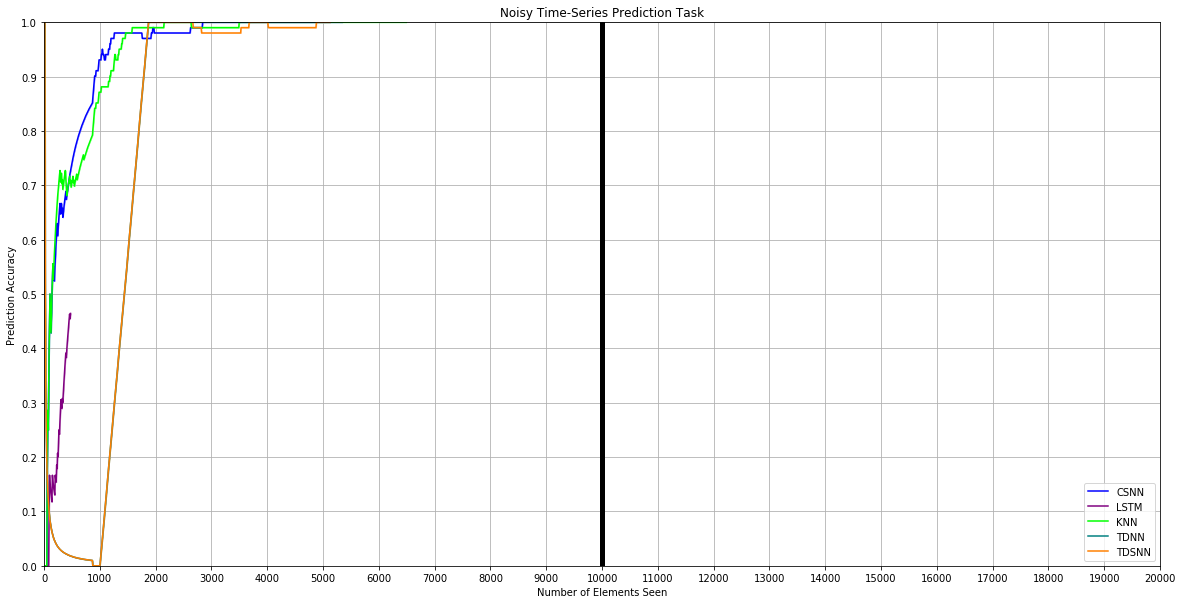

In [17]:
plt.figure(figsize=[20, 10])

plot(csnn_x, csnn_y, [0,0,1], 'CSNN')
plot(lstm_x, lstm_y, [0.5,0,0.5], 'LSTM')
plot(knn_x, knn_y, [0,1,0], 'KNN')
plot(tdnn_x, tdnn_y, [0,0.5,0.5], 'TDNN')
plot(tdsnn_x, tdsnn_y, [1,0.5,0], 'TDSNN')

plt.legend(loc='lower right')
plt.xticks(np.arange(0, 20001, 1000))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(0, 20000)
plt.ylim(0, 1)
plt.grid()
plt.title('Noisy Time-Series Prediction Task')
plt.ylabel('Prediction Accuracy')
plt.xlabel('Number of Elements Seen')
plt.plot([10000, 10000], [0, 1], linewidth=5, color='black')
plt.savefig('artificial.png', dpi=150)
plt.savefig('artificial.pdf', dpi=150)
plt.show()